# <font color='#FFE15D'>**Week 14: SVM ⚞**</font>

## **🔸 Imports**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **🔸 Perceptron (from Scratch)**

### Data

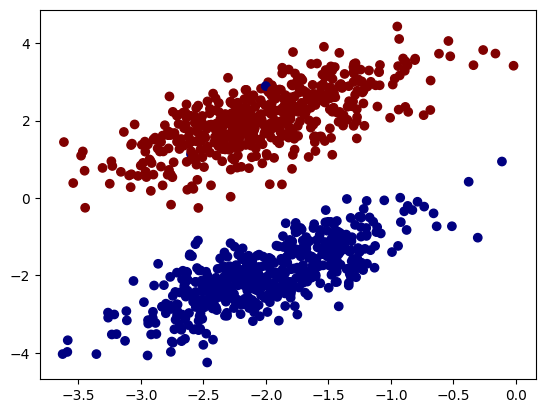

In [60]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2., random_state=12)
y = np.where(y==0, -1, y)[:, None]# converted y to vertical, also changed 0 to -1 for using in svm

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')

In [61]:
y

array([[ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],

### Model

In [62]:
class Perceptron:
    
    def __init__(self, in_features, n_iter=1000, eta=0.01, random_state=42):
        np.random.seed(random_state)
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.n_iter = n_iter
        self.eta = eta
        self.loss_hist = []
        
    def fit(self, X, y):
        # train loop
        for i in range(self.n_iter):
            y_hat = self.predict(X)
            loss = self._loss(y, y_hat)
            # print(loss.shape)
            print(loss)
            grad_w, grad_b = self._grad(X, y, y_hat)
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            self.loss_hist.append(loss)
            
    def predict(self, x):
        return x @ self.w + self.b
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return self._accuracy(y, y_hat, t=0)
    
    def _accuracy(self, y, y_hat, t=0):
        y_hat = np.where(y_hat<t, -1, 1)
        acc = np.sum(y == y_hat) / len(y)
        return acc
    
    def _loss(self, y, y_hat):
        return np.maximum(0, -y*y_hat).mean()
    
    def _grad(self, x, y, y_hat): 
        grad_w = (-y*x * np.heaviside(-y*y_hat, 1)).mean(axis=0).reshape(self.w.shape)
        grad_b = (-y * np.heaviside(-y*y_hat, 1)).mean(axis=0)
        return grad_w, grad_b

### Train

In [63]:
model = Perceptron(in_features=2, n_iter=1000, eta=0.01, random_state=2)
model.fit(X, y)

0.7012462739684124
0.6784369154252802
0.6556275568821479
0.6328181983390156
0.6100088397958835
0.5871994812527512
0.564390122709619
0.5415807641664867
0.5187714056233544
0.4959620470802222
0.4731526885370901
0.45034332999395776
0.4275339714508255
0.404741818702209
0.3820442422037582
0.35938394304002624
0.33693207950304005
0.3146199271609413
0.29239497593452324
0.270552227208636
0.24909162564129786
0.2282250019286683
0.20827678311078687
0.18980304682530028
0.1727443384880838
0.1565952267985018
0.14130051240548067
0.12707719940285886
0.11442325024664135
0.10320878962096786
0.09342182092812215
0.0848489048921742
0.07737202824549565
0.07076887228135788
0.06499007642624126
0.059898366760189135
0.05535945898483706
0.051370494372341056
0.04776065231030852
0.04450477577460456
0.041537401759973565
0.038917572992203685
0.03666244318924488
0.03477695907875612
0.033057289778204095
0.03144309216807604
0.02995676051021374
0.02860257905794513
0.027397737065777108
0.02626909028398102
0.025253339177415

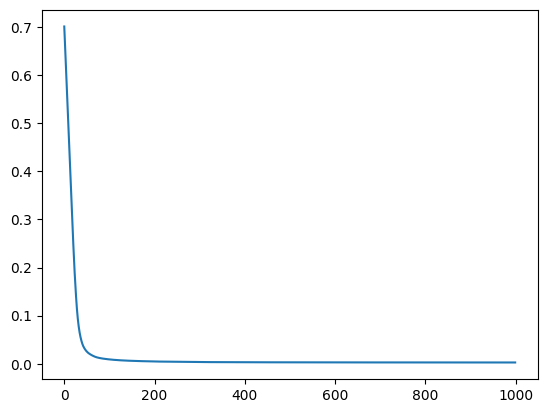

In [64]:
plt.plot(model.loss_hist)

In [65]:
model.loss_hist[-1]

0.002630349762611772

### Evaluation

In [66]:
model.score(X, y)

0.993

### Decision Boundary

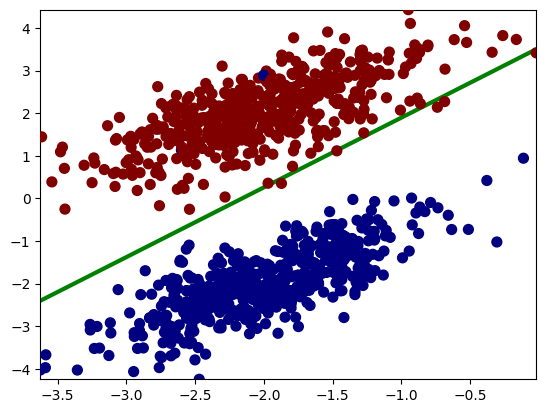

In [67]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1pm, x2pm = np.meshgrid(x1r, x2r)

Xpm = np.stack((x1pm.flatten(), x2pm.flatten()), axis=1)
ypm = model.predict(Xpm)
ypm = ypm.reshape(x1pm.shape)

plt.contour(x1pm, x2pm, ypm, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

### Find and remove out layers manual and retrain

154 [-2.59933761  1.13168499] [-1] [0.97090076]
770 [-2.00151302  2.89163354] [-1] [1.38003189]


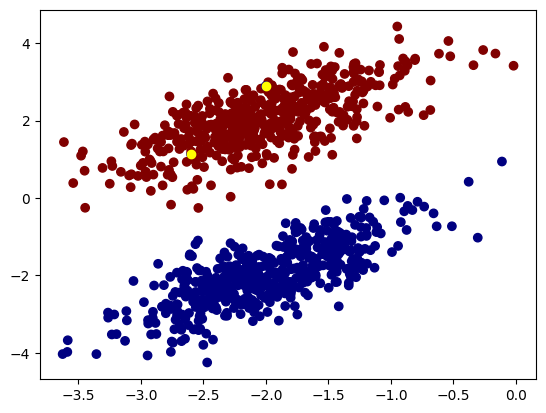

In [68]:
Xm, ym = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=12,
)
ym = np.where(ym == 0, -1, ym)[
    :, None
]  # converted y to vertical, also changed 0 to -1 for using in svm
plt.scatter(Xm[:, 0], Xm[:, 1], c=ym, cmap="jet")

index_for_remove = []
for i in range(len(Xm)):
    if ym[i] < 0:
        if model.predict(x=Xm[i]) > 0:
            print(i, Xm[i], ym[i], model.predict(x=Xm[i]))
            plt.scatter(Xm[i, 0], Xm[i, 1], c="yellow")
            index_for_remove.append(i)


998 998


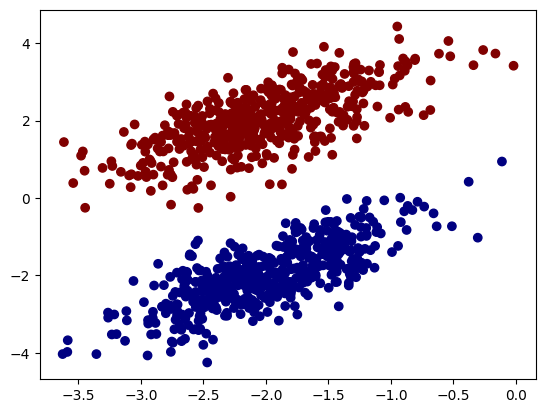

In [69]:
# for i in range(len(index_for_remove),0,-1):
#     # print(i, len(index_for_remove))

Xm = np.delete(Xm, index_for_remove, 0)
ym = np.delete(ym, index_for_remove, 0)
print(len(Xm), len(ym))
plt.scatter(Xm[:, 0], Xm[:, 1], c=ym, cmap="jet")

In [70]:
model.fit(Xm, ym)

0.00027960763493319
0.00027825896945718524
0.000276910303981181
0.00027556163850517626
0.00027421297302917153
0.0002728643075531668
0.00027151564207716206
0.0002701669766011573
0.0002688183111251524
0.00026746964564914786
0.00026612098017314334
0.0002647723146971384
0.00026342364922113366
0.00026207498374512935
0.0002607263182691242
0.00025937765279311967
0.00025802898731711494
0.0002566803218411102
0.0002553316563651057
0.00025398299088910095
0.00025263432541309643
0.00025128565993709197
0.00024993699446108675
0.000248588328985082
0.00024732800600694543
0.00024638511402495995
0.00024544222204297516
0.0002444993300609899
0.00024355643807900487
0.0002426135460970196
0.00024167065411503458
0.00024072776213304953
0.00023978487015106404
0.0002388419781690788
0.00023789908618709353
0.0002369561942051085
0.00023601330222312368
0.00023507041024113865
0.00023412751825915338
0.00023318462627716836
0.0002322417342951831
0.00023129884231319807
0.0002303559503312128
0.000229413058349228
0.00022847

In [71]:
model.score(X, y)

0.998

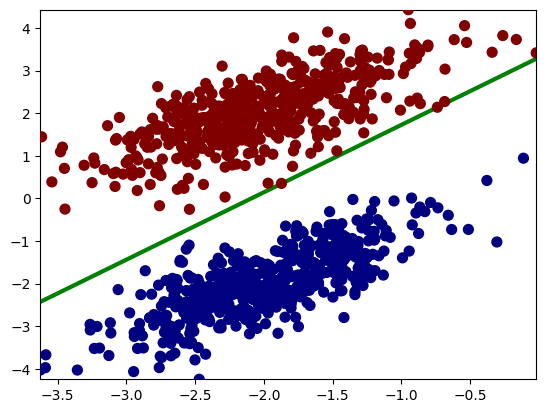

In [72]:
n = 1000
xmin, xmax = Xm.min(0), Xm.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1mpm, x2mpm = np.meshgrid(x1r, x2r)

Xmpm = np.stack((x1mpm.flatten(), x2mpm.flatten()), axis=1)
ympm = model.predict(Xmpm)
ympm = ympm.reshape(x1mpm.shape)

plt.contour(x1mpm, x2mpm, ympm, levels=[0], linewidths=3, colors='green')

plt.scatter(Xm[:, 0], Xm[:, 1], c=ym, cmap='jet', s=50, zorder=3)